# Project description

**The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.**

**You should:**

  - Learn to predict the probability of churn (for the upcoming month) for each customer
  - Draw up typical user portraits: select the most outstanding groups and describe their main features
  - Analyze the factors that impact churn most
  - Draw basic conclusions and develop recommendations on how to improve customer service:
  - Identify target groups
  - Suggest measures to cut churn
  - Describe any other patterns you see with respect to interaction with customers

## Step 1. Download the data and Carry out exploratory data analysis (EDA)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sea
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [14]:
data = pd.read_csv('C:\\Users\\evyke\\Downloads\\forecast and predictions\\moved_gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

everithing looks good, no missing values. just need to change the columns char to lower case.

In [16]:
data.columns = data.columns.str.lower()

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [18]:
gym_left = data[data['churn']==1]
gym_stay = data[data['churn']==0]

In [19]:
gym_left.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


so, almost quarter is left. we can say rapidly that is not metter of gender, cuz the mean value under gender feature are the in two groups.
about location, there is 10% difrence between the groups, also is a logical thing that lcation will impact on customer.
about "Partner", we can asuume, as all cases, the price has the most effect on churn, and that why more peploe who dosnt have this discount were left.
about Contract_period, the most left month is left so they not hurry to leave.
Also regarding participation in an active part in companies there is an effect, the more active a part is taken, there is a greater tendency to retain the customer.
also the age has a littel impact.

In [20]:
gym_stay.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


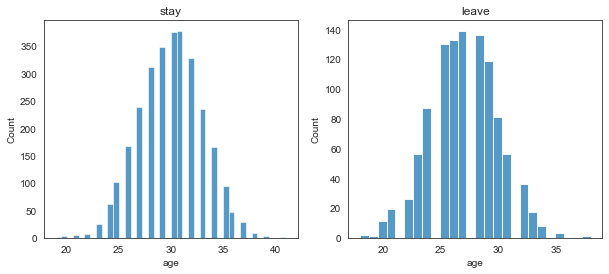

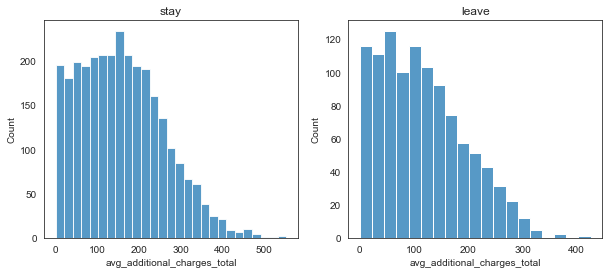

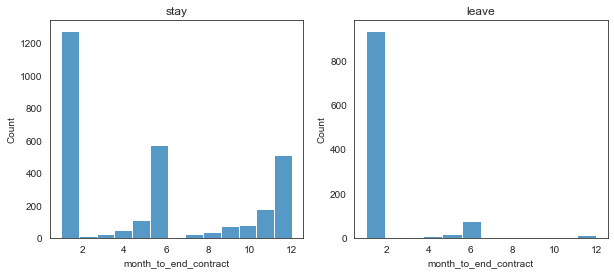

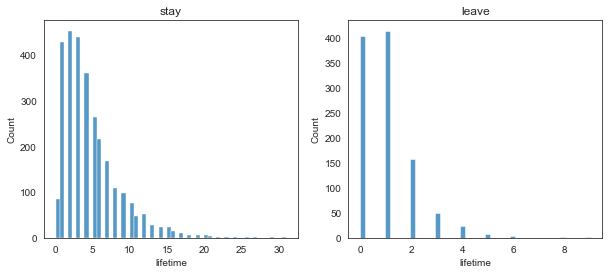

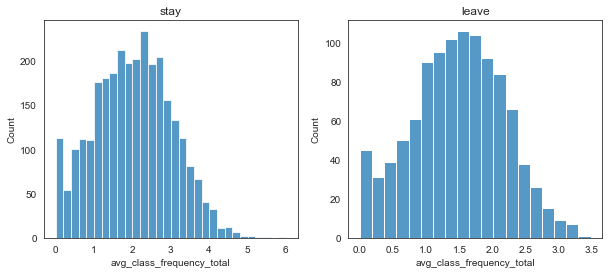

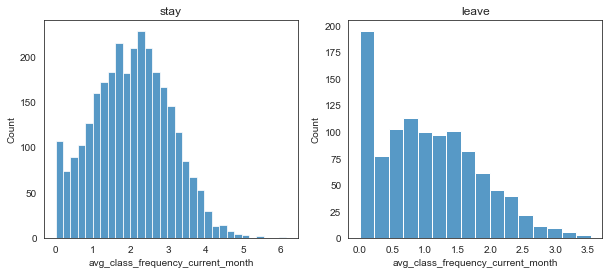

In [26]:
for col in data[['age', 'avg_additional_charges_total', 'month_to_end_contract','lifetime',
                'avg_class_frequency_total', 'avg_class_frequency_current_month']]:
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(data=data.query('churn == 0'), x=col, ax=axes[0]).set(title='stay')
    sns.histplot(data=data.query('churn == 1'), x=col, ax=axes[1]).set(title='leave')
    plt.show()

So, what can we say directly from these charts?.

- Abandoning a customer is not racist, there is no difference between women and men.
- Proximity of location is indeed very influential (in percentages, because the number of leavers in both groups is almost the same, but not proportional).

- Club membership also has an effect, it can be seen that among those who left the membership rate is low. The same goes for promo_friends.

- The time left for the contract is also a parameter worth checking.

And so, the list of factors influencing abandonment rates are so many that with human/visual analysis it will be difficult to predict whether a customer will leave in the coming months or not. And that is exactly why we will use machine learning.

In [27]:
gym_left_corr = gym_left.corr()
gym_left_corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.011913,0.009509,-0.012723,-0.008811,0.023992,0.027271,0.017344,0.005232,0.022929,-0.008307,0.002240,-0.015462,NaN
near_location,0.011913,1.000000,-0.049416,0.197275,-0.021734,0.058915,0.111250,0.008065,-0.003562,0.061410,-0.008687,0.044960,0.040668,NaN
partner,0.009509,-0.049416,1.000000,0.379864,-0.022625,0.172161,0.016582,-0.037490,-0.015331,0.167682,0.025813,0.001292,-0.025983,NaN
promo_friends,-0.012723,0.197275,0.379864,1.000000,0.024085,0.091260,0.074777,-0.032778,0.041355,0.087734,-0.020081,-0.014362,-0.024533,NaN
phone,-0.008811,-0.021734,-0.022625,0.024085,1.000000,-0.010393,-0.045483,-0.017676,0.026027,-0.015813,0.011553,-0.031635,-0.004533,NaN
contract_period,0.023992,0.058915,0.172161,0.091260,-0.010393,1.000000,0.035279,-0.040035,0.026716,0.982937,0.017638,0.045401,0.025777,NaN
group_visits,0.027271,0.111250,0.016582,0.074777,-0.045483,0.035279,1.000000,-0.004442,-0.022049,0.044576,-0.044651,0.050217,0.004890,NaN
age,0.017344,0.008065,-0.037490,-0.032778,-0.017676,-0.040035,-0.004442,1.000000,0.006157,-0.049213,0.060986,0.011902,0.006559,NaN
avg_additional_charges_total,0.005232,-0.003562,-0.015331,0.041355,0.026027,0.026716,-0.022049,0.006157,1.000000,0.027075,-0.035565,0.002112,0.006022,NaN
month_to_end_contract,0.022929,0.061410,0.167682,0.087734,-0.015813,0.982937,0.044576,-0.049213,0.027075,1.000000,0.009349,0.036355,0.019289,NaN


In [28]:
gym_stay_corr = gym_stay.corr()
gym_stay_corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.004588,-0.017409,-0.002746,-0.008443,-0.002893,0.015434,0.014745,-0.013551,-0.005047,0.019150,0.018719,0.017506,NaN
near_location,0.004588,1.000000,-0.015871,0.198554,-0.013571,0.130844,0.147798,0.006876,0.023125,0.122438,0.022296,0.001698,0.000975,NaN
partner,-0.017409,-0.015871,1.000000,0.455108,0.021220,0.294745,-0.011820,-0.011818,-0.006994,0.280882,-0.013123,-0.019247,-0.020797,NaN
promo_friends,-0.002746,0.198554,0.455108,1.000000,-0.004713,0.217869,0.099610,-0.012915,-0.003494,0.212872,0.003754,-0.012794,-0.012416,NaN
phone,-0.008443,-0.013571,0.021220,-0.004713,1.000000,-0.007959,0.000789,-0.011362,0.004559,-0.012660,-0.026664,0.018325,0.019386,NaN
contract_period,-0.002893,0.130844,0.294745,0.217869,-0.007959,1.000000,0.126558,-0.021563,0.039649,0.967340,-0.001045,-0.006538,-0.005080,NaN
group_visits,0.015434,0.147798,-0.011820,0.099610,0.000789,0.126558,1.000000,0.015875,0.001929,0.118517,0.002835,0.005587,0.003851,NaN
age,0.014745,0.006876,-0.011818,-0.012915,-0.011362,-0.021563,0.015875,1.000000,-0.001919,-0.020407,-0.024132,0.023803,0.022948,NaN
avg_additional_charges_total,-0.013551,0.023125,-0.006994,-0.003494,0.004559,0.039649,0.001929,-0.001919,1.000000,0.044765,-0.007366,-0.006934,-0.004487,NaN
month_to_end_contract,-0.005047,0.122438,0.280882,0.212872,-0.012660,0.967340,0.118517,-0.020407,0.044765,1.000000,-0.008097,-0.016365,-0.015420,NaN


In [29]:
df = data.groupby(['lifetime', 'avg_class_frequency_total'])['age'].sum().reset_index()
df.head(10)

,lifetime,avg_class_frequency_total,age
0,0,0.000000,363
1,0,0.011361,29
2,0,0.052336,28
3,0,0.063015,28
4,0,0.101940,27
5,0,0.104019,27
6,0,0.134572,27
7,0,0.135005,28
8,0,0.146977,29
9,0,0.153070,25


## step 2: Build a model to predict user churn

In [30]:
X = data.drop('churn', axis=1)
y = data['churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
models = [LogisticRegression(), RandomForestClassifier()]

def make_prediction(m ,X_train, X_test, y_train, y_test):
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f}  Precision:{:.2f}  Recall:{:.2f}'.format(accuracy_score(y_test,y_pred),
                                                                                  precision_score(y_test,y_pred),
                                                                                  recall_score(y_test,y_pred)))
    
for i in models:
    print(i)
    make_prediction(i,X_train, X_test, y_train, y_test)

LogisticRegression()
Accuracy:0.91  Precision:0.83  Recall:0.80
RandomForestClassifier()
Accuracy:0.91  Precision:0.85  Recall:0.79


##  step 3: Create user clusters

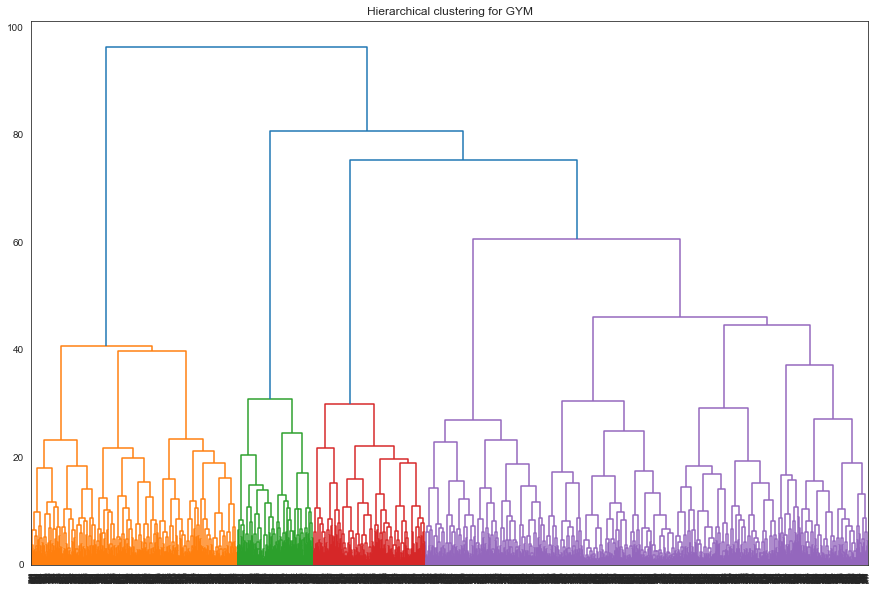

In [31]:
scaler = StandardScaler() # creating a scaler class object (normalizer)
x_sc = scaler.fit_transform(X_train, y_train)
linked = linkage(x_sc, method = 'ward')


plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 


acording to the dendograms, the number of cluster is 4(the number of color in the plot).

Train the clustering model with the K-means algorithm and predict customer clusters.

In [32]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5,random_state=0) 
labels = km.fit_predict(X_sc) 
data['cluster'] = labels.tolist()

data['cluster'].mean()

2.13325

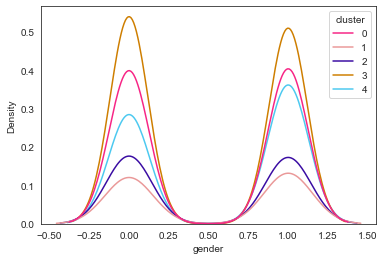

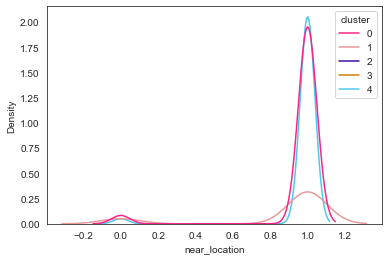

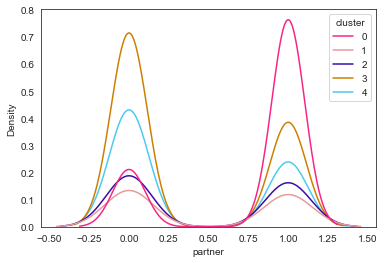

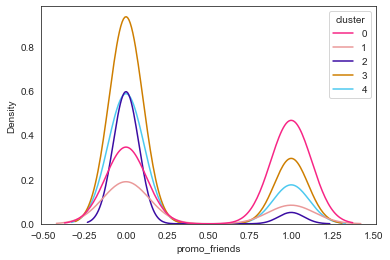

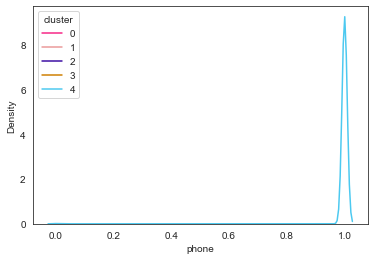

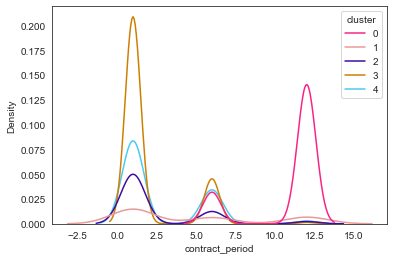

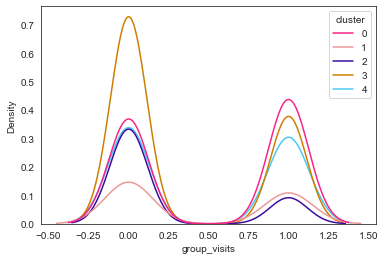

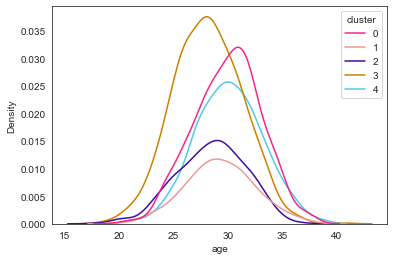

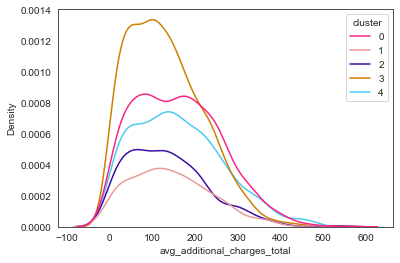

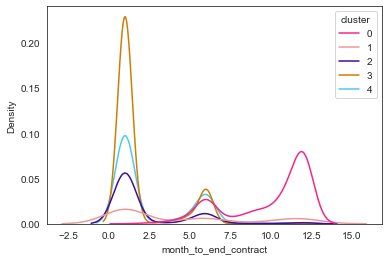

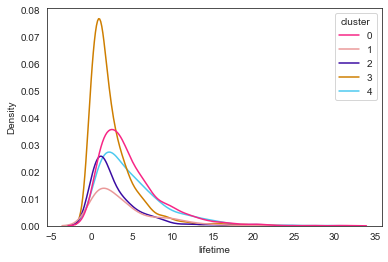

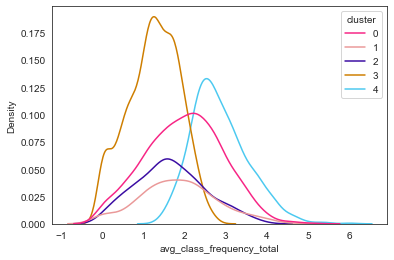

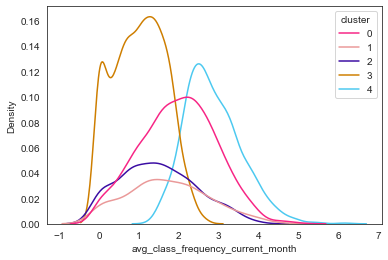

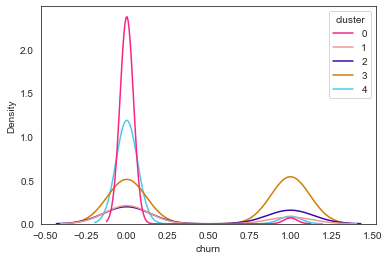

In [33]:
warnings.filterwarnings('ignore')
#histograms distirbution for each feature to cluster  
for col in data.drop('cluster', axis=1):
    sea.kdeplot(data=data, x=col, hue='cluster',
                palette=["#F72585", "#EA9999","#3A0CA3","#CE7E00","#4CC9F0"])
    plt.show()
    

In [34]:
data_churn = data.groupby(['cluster','churn'])['gender'].count().reset_index()
data_churn

,cluster,churn,gender
0,0,0,982
1,0,1,28
2,1,0,282
3,1,1,103
4,2,0,281
5,2,1,224
6,3,0,613
7,3,1,649
8,4,0,781
9,4,1,57


groups 0 and 3 with high rate of churn, group 4 with 0.32 rate churn and its not good for the busniess.the rest of the groups are fine.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Clusters were identified and studied successfully

</div>

# step 4  conclusions and basic recommendations on working with customers

### Step 1. Download the data and Carry out exploratory data analysis (EDA)
- **We received a dataset with 4000 objects and data on customer abandonment. The data file was successfully read, there were no missing values, we just changed the column names to make the analysis work easier(lower case).**

- **We split the data into customers who left and customers who stayed and plotted a histogram to better understand the data. I wrote a short explanation there, but the rule that comes up is that it is very difficult to answer the question of whether a customer will leave or not because the histograms showed that there are a lot of influencers, which is why we used machine learning to answer the question.**

### step 2: Build a model to predict user churn

- **we build two models(LogisticRegression(), RandomForestClassifier()) to evaluate the acuracy of the model, we used tree metric for that: acuarcy, precision and recall.**


- **The results were almost similar in both models with a slight bias in favor for tree forest.**


- **Please note: we ran the models over and over and each time we got slightly different results. This is perfectly fine and it does not indicate the instability of the models because the differences were very small.**

### step 3: Create user clusters

- **To more accurately answer the question of whether a customer will leave or not, we divided the users into groups (5) so that we know which customers are at a higher risk of leaving, so that we can concentrate our retention efforts on those customers.**

- **our concise conclusion is:groups 0 and 3 with high rate of churn, group 4 with 0.32 rate churn and its not good for the busniess.the rest of the groups are fine.**

## Recomandation.

- **Customer retention efforts (marketing, etc.) should focus on groups 0, 1 and 3, with priority to the first two.**

- **Concrete things that can be done, for example, if we identified that among clients who do not participate in training groups there is a tendency to leave, then it would perhaps be appropriate to encourage those people to participate more in the groups. Another example, we saw that there is a connection between the remoteness of the residence, maybe it is worth offering them a discount on the subscription fee so that it will pay off for them and thus they will not move to an institute closer to their home, or alternatively, offer a shuttle bus?In addition, in order to get an indication of a specific index and not of a group, the correlation matrix and the list of charts according to "cluster" should be used.**


